# Sparse imaging with LASSO

This example generates a sparse signal and tries to recover it using lasso

In [1]:
from __future__ import print_function
from __future__ import division
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
from simulator import *
%matplotlib inline

We generate an orthogonal matrix A and compute measurements = Aw+z where w is the vectorized format of the sparse image

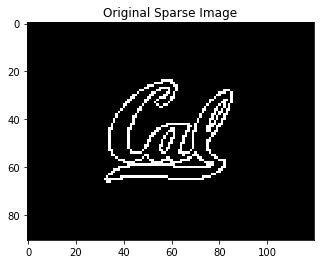

In [2]:
measurements,A,I = simulate() 

# THE SETTINGS FOR THE IMAGE - PLEASE DO NOT CHANGE
height = 91
width = 120
sparsity = 476
numPixels = len(A[0])

plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');
plt.title('Original Sparse Image')

We plot matrix A:

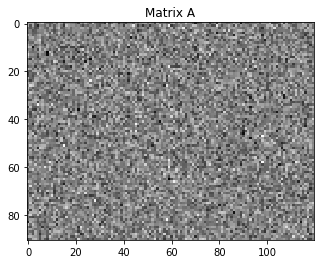

In [20]:
chosenMaskToDisplay = 0
M0 = A[chosenMaskToDisplay].reshape((height,width))
plt.title('Matrix A')
plt.imshow(M0, cmap=plt.cm.gray, interpolation='nearest');

And here is the plot of measurement vector:

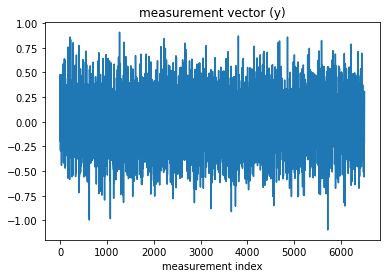

In [21]:
# measurements
plt.title('measurement vector (y)')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

We use lasso to recover the image:

In [25]:
def LASSO(imDims, measurements, A, a):
    clf = linear_model.Lasso(alpha=a)
    clf.fit(A,measurements)
    Ihat = clf.coef_.reshape(imDims)
    plt.title('estimated image')
    plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
    return clf.coef_

Change the lasso regularization parameter to recover the image and report the value.

[[ 0. -0. -0. ...,  0.  0. -0.]
 [-0.  0. -0. ..., -0. -0.  0.]
 [ 0. -0.  0. ...,  0.  0. -0.]
 ..., 
 [-0.  0. -0. ...,  0. -0.  0.]
 [-0. -0. -0. ..., -0. -0. -0.]
 [ 0.  0.  0. ...,  0.  0. -0.]]


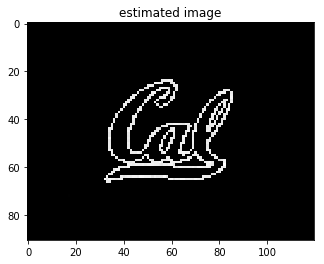

In [30]:
# appropriate lambda
a = 0.00001
recovered = LASSO((height,width),measurements,A,a)

Because The condition for generating sparsity(w_i = 0) is that A_i^T*y within [-lambda, lambda]
This means when lambda is too large, there will be so many zeros.

[[ 0. -0. -0. ...,  0.  0. -0.]
 [-0.  0. -0. ..., -0.  0.  0.]
 [ 0. -0.  0. ...,  0.  0. -0.]
 ..., 
 [-0.  0. -0. ...,  0. -0.  0.]
 [-0. -0. -0. ..., -0. -0. -0.]
 [ 0.  0.  0. ...,  0.  0. -0.]]


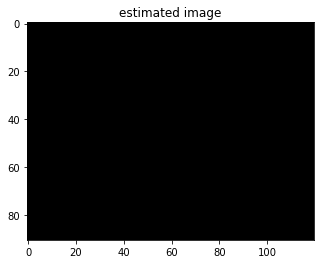

In [31]:
# lambda is large
a = 1
recovered = LASSO((height,width),measurements,A,a)

Because The condition for generating sparsity(w_i = 0) is that A_i^T*y within [-lambda, lambda]
This means when lambda is too small, there will be less zeros.

[[-0.03662078 -0.45207691 -0.07083422 ...,  0.0758507  -0.07009895
  -0.0688969 ]
 [-0.50529875  0.16315041 -0.15226952 ..., -0.00080187  0.1945343
   0.08630258]
 [-0.02972023 -0.15762112  0.0226709  ...,  0.21082238  0.16025736
  -0.72464153]
 ..., 
 [-0.0400522  -0.02515765 -0.04686682 ..., -0.19826164 -0.14973695
  -0.10333221]
 [ 0.20370217 -0.02463526 -0.10273393 ...,  0.07001685  0.07400616
   0.01256854]
 [ 0.04517431 -0.21560573  0.07605233 ...,  0.06980866  0.00223421
  -0.02412968]]


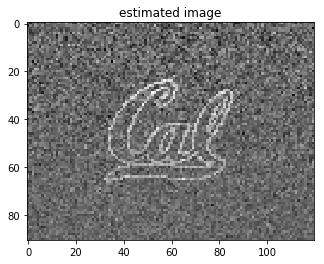

In [33]:
# lambda is small
a = 0.000000001
recovered = LASSO((height,width),measurements,A,a)

Thus a suitable lambda is the key to generate sparsity.